<a href="https://colab.research.google.com/github/nahian147/DataScienceBootCamp/blob/main/Stock_Project_final_v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [61]:
df= pd.read_csv("Stock_data.csv")


In [62]:
df.head()

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.23492,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.23521,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.23435,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.23491,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.23680,1.238700,1.236285,1.238205


In [63]:
df.columns

Index(['Gmt time', 'Volume', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [64]:
df.head()

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.23492,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.23521,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.23435,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.23491,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.23680,1.238700,1.236285,1.238205


In [65]:
#1) Ask user for start date and end date between that period.
# calculate 12-period EMA and 26-period EMA are two moving averages.
#Calculate them and plot These two with Close price in a line chart


df['Gmt time'] = pd.to_datetime(df['Gmt time'])
df.set_index('Gmt time', inplace=True)

# Ask user for start date and end date
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# Filter data between the specified start and end date
df_filtered = df.loc[start_date:end_date]

df.head()
df_filtered.head()




Enter start date (YYYY-MM-DD): 2013-01-01
Enter end date (YYYY-MM-DD): 2013-01-09


,Volume,Open,High,Low,Close
Gmt time,,,,,
2013-01-01 00:00:00,134.5200,1.268880,1.268925,1.268835,1.268880
2013-01-01 20:00:00,6457.6001,1.270260,1.272785,1.268825,1.270155
2013-01-02 00:00:00,23774.9299,1.304925,1.309065,1.303095,1.308485
2013-01-02 04:00:00,27062.6998,1.308480,1.312490,1.308480,1.309700
2013-01-02 08:00:00,44358.9393,1.309695,1.319080,1.309210,1.312475


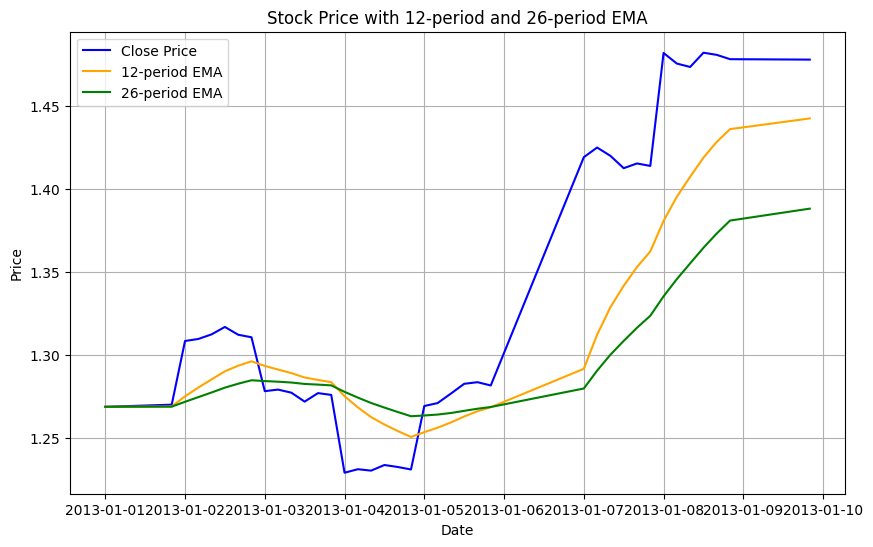

In [66]:
# # 2) Ask user for start date and end date between that period calculate.
#  12-period SMA and 26-period SMA are two moving averages. Calculate them
#  and plot These two with Close price in a line chart


# Calculate 12-period EMA and 26-period EMA
df_filtered['EMA12'] = df_filtered['Close'].ewm(span=12, adjust=False).mean()
df_filtered['EMA26'] = df_filtered['Close'].ewm(span=26, adjust=False).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
plt.plot(df_filtered.index, df_filtered['EMA12'], label='12-period EMA', color='orange')
plt.plot(df_filtered.index, df_filtered['EMA26'], label='26-period EMA', color='green')

plt.title('Stock Price with 12-period and 26-period EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

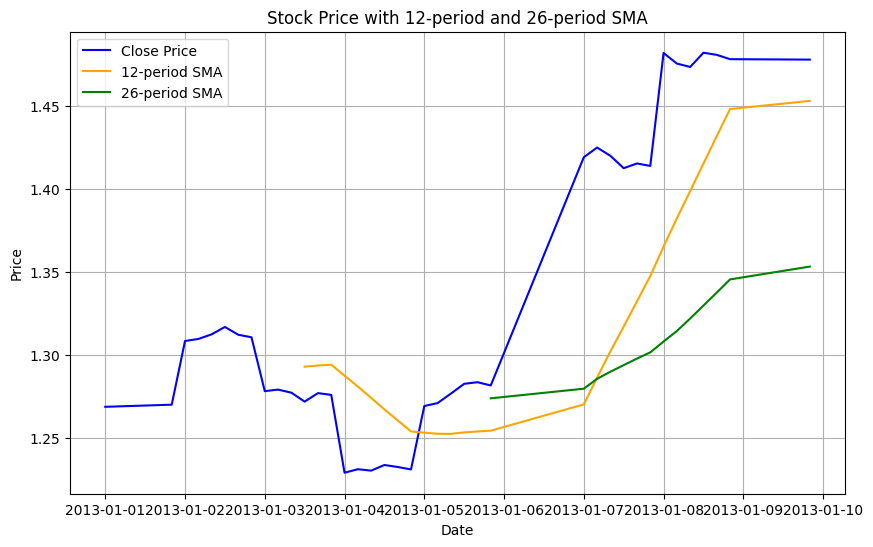

In [67]:
df_filtered['SMA12'] = df_filtered['Close'].rolling(window=12).mean()
df_filtered['SMA26'] = df_filtered['Close'].rolling(window=26).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
plt.plot(df_filtered.index, df_filtered['SMA12'], label='12-period SMA', color='orange')
plt.plot(df_filtered.index, df_filtered['SMA26'], label='26-period SMA', color='green')

plt.title('Stock Price with 12-period and 26-period SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

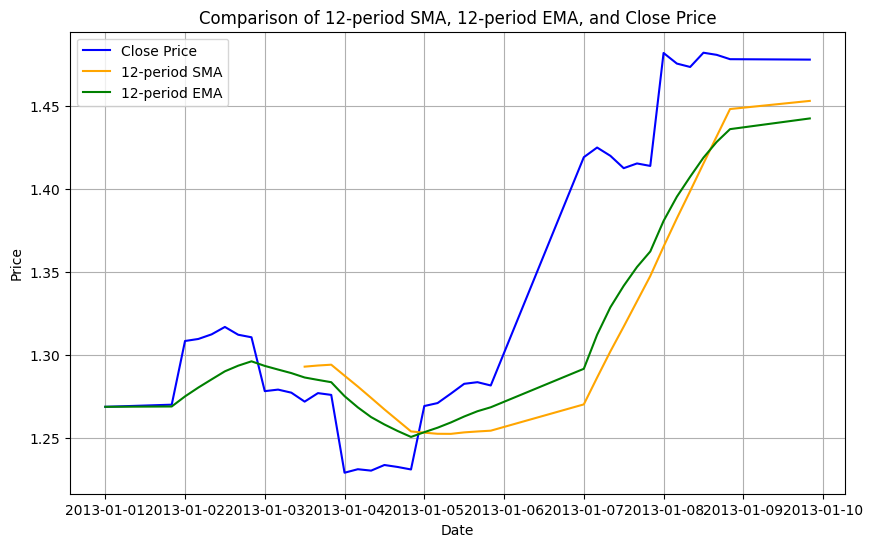

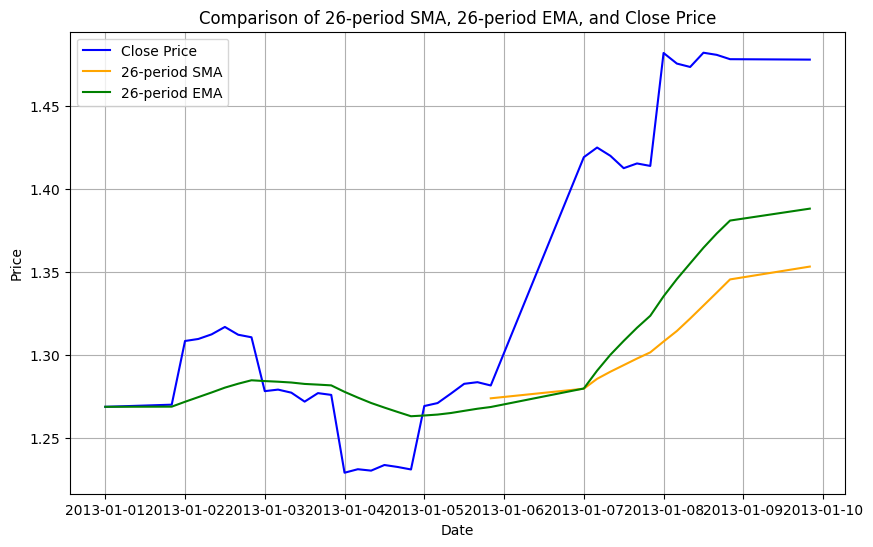

In [68]:
# a)  compare SMA 12 EMA 12 and CLOSE

# b) compare SMA 26 EMA 26 and CLOSE


# Calculate 12-period SMA, 12-period EMA, and Close
df_filtered['SMA12'] = df_filtered['Close'].rolling(window=12).mean()
df_filtered['EMA12'] = df_filtered['Close'].ewm(span=12, adjust=False).mean()

# Calculate 26-period SMA, 26-period EMA, and Close
df_filtered['SMA26'] = df_filtered['Close'].rolling(window=26).mean()
df_filtered['EMA26'] = df_filtered['Close'].ewm(span=26, adjust=False).mean()

# Plotting for 12-period comparison
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
plt.plot(df_filtered.index, df_filtered['SMA12'], label='12-period SMA', color='orange')
plt.plot(df_filtered.index, df_filtered['EMA12'], label='12-period EMA', color='green')

plt.title('Comparison of 12-period SMA, 12-period EMA, and Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for 26-period comparison
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
plt.plot(df_filtered.index, df_filtered['SMA26'], label='26-period SMA', color='orange')
plt.plot(df_filtered.index, df_filtered['EMA26'], label='26-period EMA', color='green')

plt.title('Comparison of 26-period SMA, 26-period EMA, and Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

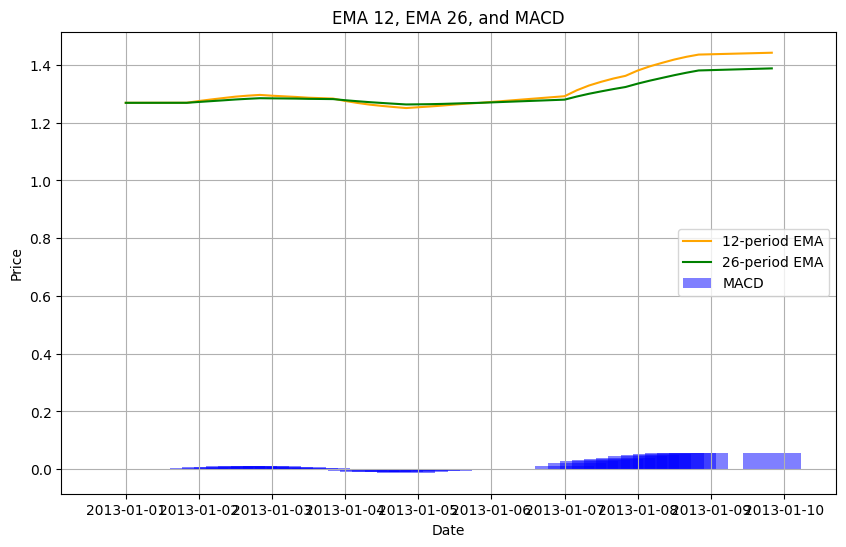

In [69]:
# 3) calculate MACD between EMA 26 and EMA 12 Plot line chart
# showing EMA 26 and EMA 12 and MACD


# Calculate 12-period EMA and 26-period EMA
df_filtered['EMA12'] = df_filtered['Close'].ewm(span=12, adjust=False).mean()
df_filtered['EMA26'] = df_filtered['Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD
df_filtered['MACD'] = df_filtered['EMA12'] - df_filtered['EMA26']

# Plotting
plt.figure(figsize=(10, 6))

# Plot EMA 12 and EMA 26
plt.plot(df_filtered.index, df_filtered['EMA12'], label='12-period EMA', color='orange')
plt.plot(df_filtered.index, df_filtered['EMA26'], label='26-period EMA', color='green')

# Plot MACD
plt.bar(df_filtered.index, df_filtered['MACD'], label='MACD', color='blue', alpha=0.5)

plt.title('EMA 12, EMA 26, and MACD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

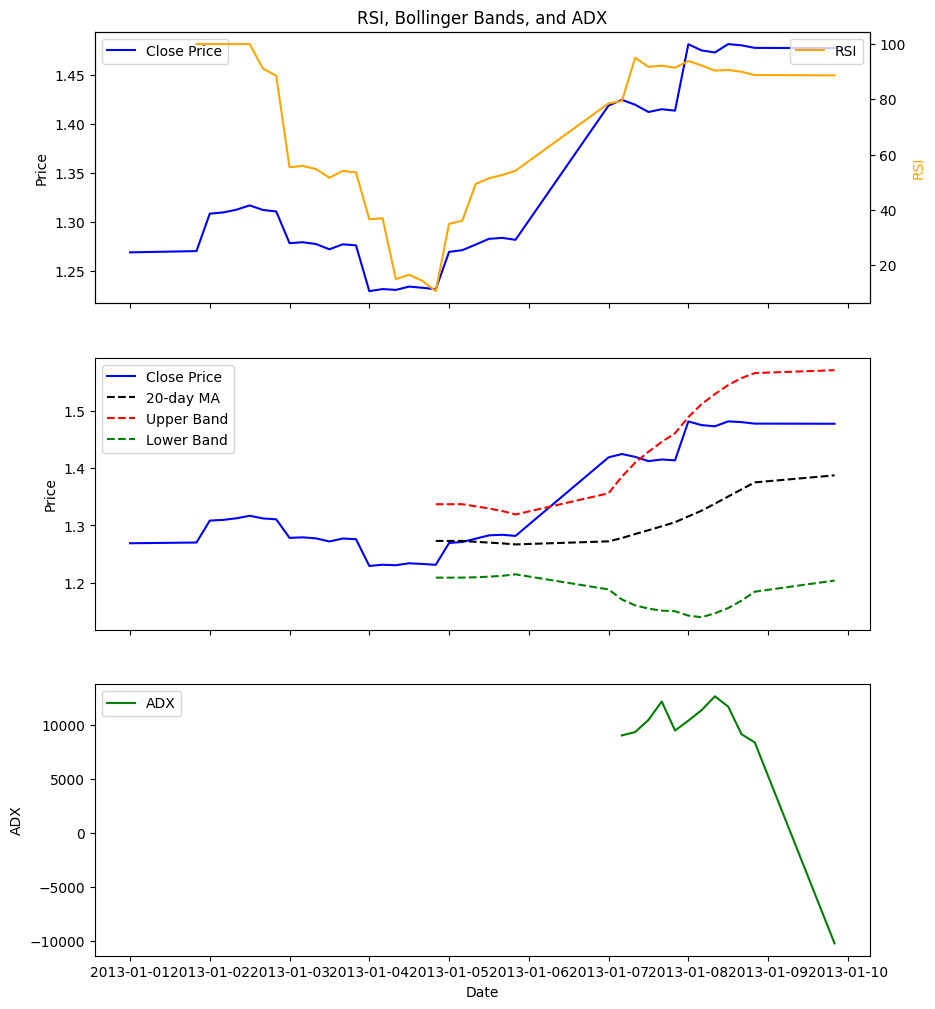

In [71]:
#Calculate RSI, Bollinger bands and ADX using the notebook for our own data

# Calculate RSI
delta = df_filtered['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

average_gain = gain.rolling(window=14, min_periods=1).mean()
average_loss = loss.rolling(window=14, min_periods=1).mean()

relative_strength = average_gain / average_loss
rsi = 100 - (100 / (1 + relative_strength))
df_filtered['RSI'] = rsi

# Calculate Bollinger Bands
df_filtered['MA20'] = df_filtered['Close'].rolling(window=20).mean()
df_filtered['UpperBand'] = df_filtered['MA20'] + 2 * df_filtered['Close'].rolling(window=20).std()
df_filtered['LowerBand'] = df_filtered['MA20'] - 2 * df_filtered['Close'].rolling(window=20).std()

# Calculate ADX
positive_move = df_filtered['High'].diff()
negative_move = -df_filtered['Low'].diff()

average_positive = positive_move.rolling(window=14).mean()
average_negative = negative_move.rolling(window=14).mean()

relative_strength_index = average_positive / average_negative
adx = (abs(average_positive - average_negative) / (average_positive + average_negative)).rolling(window=14).mean()
df_filtered['ADX'] = adx * 100

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot RSI
ax1.plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')

ax1_2 = ax1.twinx()
ax1_2.plot(df_filtered.index, df_filtered['RSI'], label='RSI', color='orange')
ax1_2.set_ylabel('RSI', color='orange')
ax1_2.legend(loc='upper right')

# Plot Bollinger Bands
ax2.plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
ax2.plot(df_filtered.index, df_filtered['MA20'], label='20-day MA', color='black', linestyle='--')
ax2.plot(df_filtered.index, df_filtered['UpperBand'], label='Upper Band', color='red', linestyle='--')
ax2.plot(df_filtered.index, df_filtered['LowerBand'], label='Lower Band', color='green', linestyle='--')
ax2.set_ylabel('Price')
ax2.legend(loc='upper left')

# Plot ADX
ax3.plot(df_filtered.index, df_filtered['ADX'], label='ADX', color='green')
ax3.set_xlabel('Date')
ax3.set_ylabel('ADX')
ax3.legend(loc='upper left')

plt.title('RSI, Bollinger Bands, and ADX')
plt.show()

In [ ]:
# Last step do a subplot with all indicators

# So your plot will have 10 subplots

# 1) SMA 12 vs close

# 2) SMA 26 vs close

# 3) EMA 12 vs close

# 4) EMA 26 vs close

# 5) MACD

# 6) RSI 12 vs close

# 7) RSI 26 vs close

# 8) Bollinger bands all three vs close

# 9) ADX

# 10) Close vs High vs Low



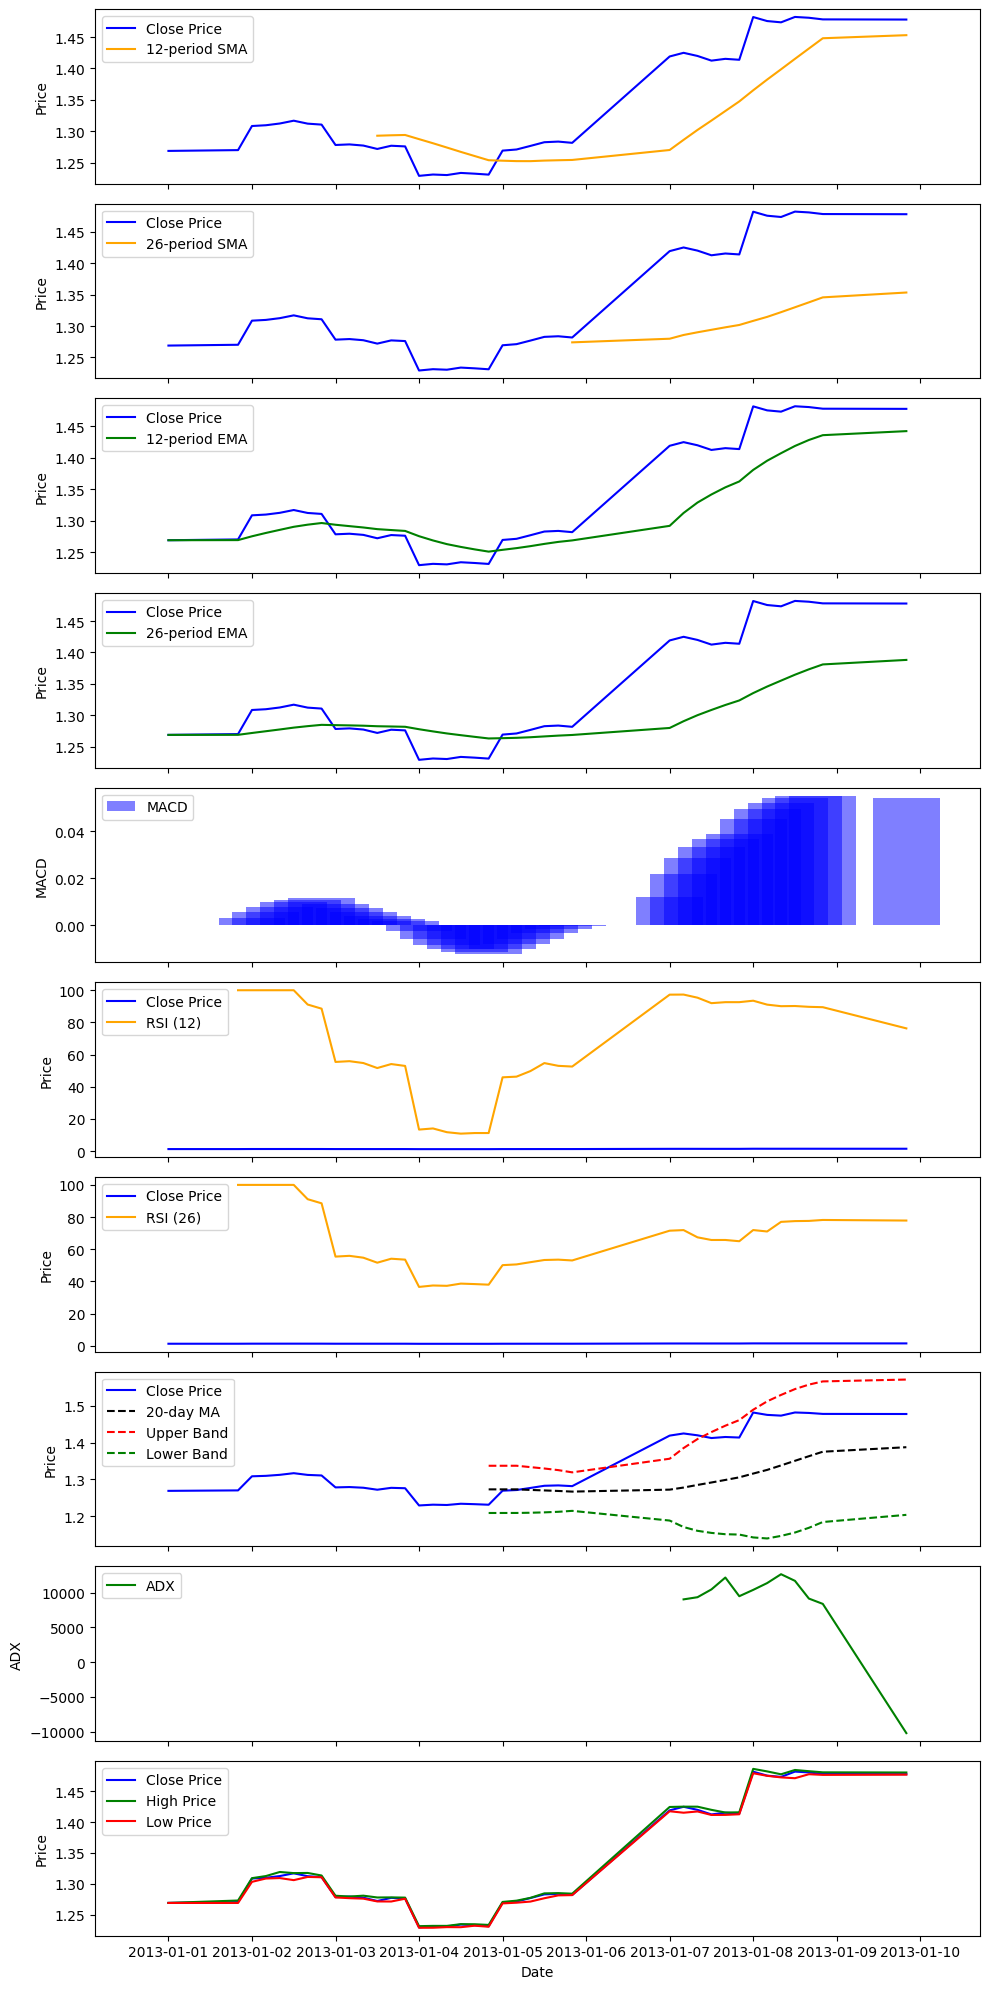

In [72]:
# Calculate SMA and EMA
df_filtered['SMA12'] = df_filtered['Close'].rolling(window=12).mean()
df_filtered['SMA26'] = df_filtered['Close'].rolling(window=26).mean()
df_filtered['EMA12'] = df_filtered['Close'].ewm(span=12, adjust=False).mean()
df_filtered['EMA26'] = df_filtered['Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD
df_filtered['MACD'] = df_filtered['EMA12'] - df_filtered['EMA26']

# Calculate RSI
delta = df_filtered['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
average_gain = gain.rolling(window=12, min_periods=1).mean()
average_loss = loss.rolling(window=12, min_periods=1).mean()
relative_strength = average_gain / average_loss
rsi12 = 100 - (100 / (1 + relative_strength))
df_filtered['RSI12'] = rsi12

average_gain = gain.rolling(window=26, min_periods=1).mean()
average_loss = loss.rolling(window=26, min_periods=1).mean()
relative_strength = average_gain / average_loss
rsi26 = 100 - (100 / (1 + relative_strength))
df_filtered['RSI26'] = rsi26

# Calculate Bollinger Bands
df_filtered['MA20'] = df_filtered['Close'].rolling(window=20).mean()
df_filtered['UpperBand'] = df_filtered['MA20'] + 2 * df_filtered['Close'].rolling(window=20).std()
df_filtered['LowerBand'] = df_filtered['MA20'] - 2 * df_filtered['Close'].rolling(window=20).std()

# Calculate ADX
positive_move = df_filtered['High'].diff()
negative_move = -df_filtered['Low'].diff()
average_positive = positive_move.rolling(window=14).mean()
average_negative = negative_move.rolling(window=14).mean()
relative_strength_index = average_positive / average_negative
adx = (abs(average_positive - average_negative) / (average_positive + average_negative)).rolling(window=14).mean()
df_filtered['ADX'] = adx * 100

# Plotting
fig, axes = plt.subplots(10, 1, figsize=(10, 20), sharex=True)

# Subplot 1: SMA 12 vs Close
axes[0].plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
axes[0].plot(df_filtered.index, df_filtered['SMA12'], label='12-period SMA', color='orange')
axes[0].set_ylabel('Price')
axes[0].legend(loc='upper left')

# Subplot 2: SMA 26 vs Close
axes[1].plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
axes[1].plot(df_filtered.index, df_filtered['SMA26'], label='26-period SMA', color='orange')
axes[1].set_ylabel('Price')
axes[1].legend(loc='upper left')

# Subplot 3: EMA 12 vs Close
axes[2].plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
axes[2].plot(df_filtered.index, df_filtered['EMA12'], label='12-period EMA', color='green')
axes[2].set_ylabel('Price')
axes[2].legend(loc='upper left')

# Subplot 4: EMA 26 vs Close
axes[3].plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
axes[3].plot(df_filtered.index, df_filtered['EMA26'], label='26-period EMA', color='green')
axes[3].set_ylabel('Price')
axes[3].legend(loc='upper left')

# Subplot 5: MACD
axes[4].bar(df_filtered.index, df_filtered['MACD'], label='MACD', color='blue', alpha=0.5)
axes[4].set_ylabel('MACD')
axes[4].legend(loc='upper left')

# Subplot 6: RSI 12 vs Close
axes[5].plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
axes[5].plot(df_filtered.index, df_filtered['RSI12'], label='RSI (12)', color='orange')
axes[5].set_ylabel('Price')
axes[5].legend(loc='upper left')

# Subplot 7: RSI 26 vs Close
axes[6].plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
axes[6].plot(df_filtered.index, df_filtered['RSI26'], label='RSI (26)', color='orange')
axes[6].set_ylabel('Price')
axes[6].legend(loc='upper left')

# Subplot 8: Bollinger Bands
axes[7].plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
axes[7].plot(df_filtered.index, df_filtered['MA20'], label='20-day MA', color='black', linestyle='--')
axes[7].plot(df_filtered.index, df_filtered['UpperBand'], label='Upper Band', color='red', linestyle='--')
axes[7].plot(df_filtered.index, df_filtered['LowerBand'], label='Lower Band', color='green', linestyle='--')
axes[7].set_ylabel('Price')
axes[7].legend(loc='upper left')

# Subplot 9: ADX
axes[8].plot(df_filtered.index, df_filtered['ADX'], label='ADX', color='green')
axes[8].set_ylabel('ADX')
axes[8].legend(loc='upper left')

# Subplot 10: Close vs High vs Low
axes[9].plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='blue')
axes[9].plot(df_filtered.index, df_filtered['High'], label='High Price', color='green')
axes[9].plot(df_filtered.index, df_filtered['Low'], label='Low Price', color='red')
axes[9].set_xlabel('Date')
axes[9].set_ylabel('Price')
axes[9].legend(loc='upper left')

plt.tight_layout()
plt.show()